In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("global life expectancy dataset.csv")
data.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,75.158,75.299,75.441,75.583,75.725,75.868,76.010,76.152,76.293,76.434
1,Afghanistan,AFG,32.446,32.962,33.471,33.971,34.463,34.948,35.430,35.914,...,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,64.833,65.173
2,Angola,AGO,37.524,37.811,38.113,38.430,38.760,39.102,39.454,39.813,...,56.330,57.236,58.054,58.776,59.398,59.925,60.379,60.782,61.147,61.487
3,Albania,ALB,62.283,63.301,64.190,64.914,65.463,65.850,66.110,66.304,...,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,78.573,78.686
4,United Arab Emirates,ARE,51.537,52.560,53.573,54.572,55.555,56.523,57.482,58.432,...,76.521,76.711,76.903,77.095,77.285,77.470,77.647,77.814,77.972,78.120


In [73]:
#We are going to find USA and Turkey Datas.

tr_data = 0
usa_data = 0

for i in data["Country Code"]:
    tr_data += 1
    if i == "TUR":
        break
for j in data["Country Code"]:
    usa_data += 1
    if j == "USA":
        break
print(f"Turkey in {tr_data-1}")
print(f"USA in {usa_data-1}")

Turkey in 187
USA in 192


In [74]:
del data["Country Name"]
del data["Country Code"]

In [75]:
tr = data.iloc[187]
usa = data.iloc[192]

In [76]:
tr

1960    45.369
1961    46.093
1962    46.830
1963    47.573
1964    48.312
         ...  
2016    76.860
2017    77.161
2018    77.437
2019    77.691
2020    77.928
Name: 187, Length: 61, dtype: float64

In [77]:
usa

1960    69.770732
1961    70.270732
1962    70.119512
1963    69.917073
1964    70.165854
          ...    
2016    78.539024
2017    78.539024
2018    78.639024
2019    78.787805
2020    77.280488
Name: 192, Length: 61, dtype: float64

In [78]:
years = np.arange(1960,2021).reshape(-1,1)

In [79]:
tr_array = np.array(tr).reshape(-1,1)

In [80]:
usa_array = np.array(usa).reshape(-1,1)

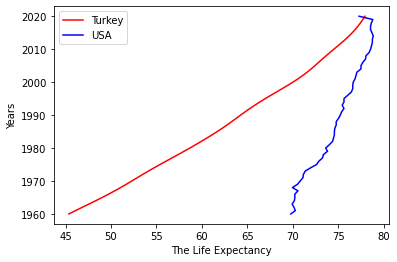

In [81]:
plt.plot(tr,years,color="r")
plt.plot(usa,years,color="b")

plt.xlabel("The Life Expectancy")
plt.ylabel("Years")

plt.legend(["Turkey","USA"])

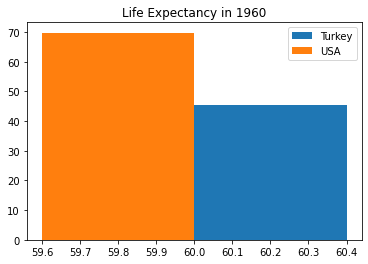

In [82]:
figure1 = plt.bar(60, tr[0], align='edge', width=0.4, label='Turkey')
figure2 = plt.bar(60, usa[0], align='edge', width=-0.4, label='USA')
plt.title("Life Expectancy in 1960")
plt.legend(["Turkey","USA"])

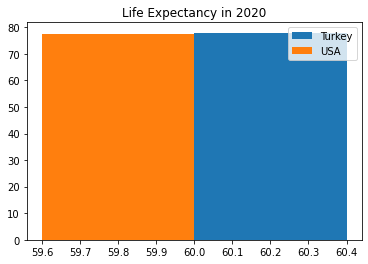

In [83]:
figure1 = plt.bar(60, tr[60], align='edge', width=0.4, label='Turkey')
figure2 = plt.bar(60, usa[60], align='edge', width=-0.4, label='USA')
plt.title("Life Expectancy in 2020")
plt.legend(["Turkey","USA"])

In [84]:

from sklearn.model_selection import train_test_split
x_tr_train, x_tr_test, y_tr_train, y_tr_test = train_test_split(tr_array, years, test_size=0.3, random_state=0)
x_usa_train, x_usa_test, y_usa_train, y_usa_test = train_test_split(usa_array, years, test_size=0.3, random_state=0)


In [85]:
#Regression Analysis

from sklearn.linear_model import LinearRegression
lr_tr = LinearRegression()
lr_tr.fit(x_tr_train,y_tr_train)
tr_sq = lr_tr.score(x_tr_test, y_tr_test)
print(f"coefficient of determination: {tr_sq}")

coefficient of determination: 0.9900148684679955


In [86]:
#Regression Analysis

from sklearn.linear_model import LinearRegression
lr_usa = LinearRegression()
lr_usa.fit(x_usa_train,y_usa_train)
usa_sq = lr_usa.score(x_usa_test, y_usa_test)
print(f"coefficient of determination: {usa_sq}")

coefficient of determination: 0.9326435096308857


In [87]:
#Graphs For Regression

tr_pred = lr_tr.predict(x_tr_test)
usa_pred = lr_usa.predict(x_usa_test)

Text(0, 0.5, 'Years')

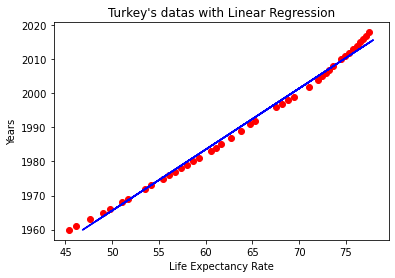

In [88]:
plt.scatter(x_tr_train,y_tr_train,color="r")
plt.plot(x_tr_test,tr_pred,color="b")

plt.title("Turkey's datas with Linear Regression")
plt.xlabel("Life Expectancy Rate")
plt.ylabel("Years")

Text(0, 0.5, 'Years')

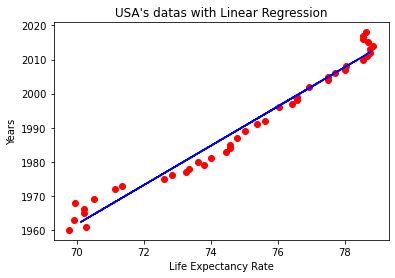

In [89]:
plt.scatter(x_usa_train,y_usa_train,color="r")
plt.plot(x_usa_test,usa_pred,color="b")

plt.title("USA's datas with Linear Regression")
plt.xlabel("Life Expectancy Rate")
plt.ylabel("Years")

In [148]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(2)

poly_fit_tr = poly1.fit_transform(tr_array)

tr_poly = LinearRegression()

tr_poly.fit(poly_fit_tr,years)

tr_pred = tr_poly.predict(poly_fit_tr)

Text(0.5, 1.0, 'Turkey')

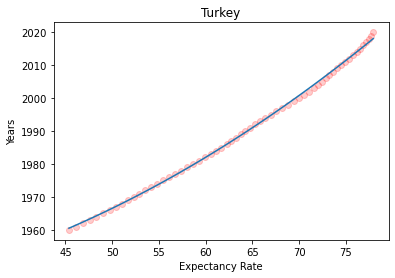

In [153]:
plt.scatter(tr,years,color="r",alpha=0.2)
plt.plot(tr,tr_pred)
plt.xlabel("Expectancy Rate")
plt.ylabel("Years")
plt.title("Turkey")

In [160]:
poly2 = PolynomialFeatures(3)

poly_fit_usa = poly1.fit_transform(usa_array)

usa_poly = LinearRegression()

usa_poly.fit(poly_fit_usa,years)

usa_pred = usa_poly.predict(poly_fit_usa)

Text(0.5, 1.0, 'USA')

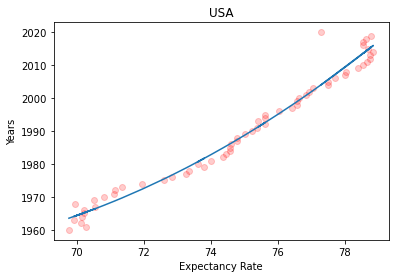

In [161]:
plt.scatter(usa,years,color="r",alpha=0.2)
plt.plot(usa,usa_pred)
plt.xlabel("Expectancy Rate")
plt.ylabel("Years")
plt.title("USA")

In [ ]:
#End Of the Analysis and Comperasion!